<a href="https://colab.research.google.com/github/lytogawa/Aplikasi-Login/blob/main/Gatot_Submission_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: Animal Classification
- **Nama:** Gatot Santoso
- **Email:** santosogatot88@gmail.com
- **ID Dicoding:** gatotsan


# Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflow-datasets
!pip install opencv-python
!pip install keras

In [2]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

!pip install tensorflow
# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers, applications, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LambdaCallback

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
translate = {"cane": "Dog", "cavallo": "Horse", "elefante": "Elephant", "farfalla": "Butterfly", "gallina": "Chicken", "gatto": "Cat", "mucca": "Cow", "pecora": "Sheep", "scoiattolo": "Squirrel", "ragno": "Spider"}

In [4]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.16.2


In [ ]:
# Seed Everything to reproduce results for future use cases
def seed_everything(seed=42):
    # Seed value for TensorFlow
    tf.random.set_seed(seed)

    # Seed value for NumPy
    np.random.seed(seed)

    # Seed value for Python's random library
    random.seed(seed)

seed_everything()

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Check if the file exists
import os
if os.path.exists('helper_functions.py'):
    print("File downloaded successfully!")
    # Import series of helper functions for our notebook
    from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot
else:
    print("File not found. Please check the download link and try again.")

zsh:1: command not found: wget
File not found. Please check the download link and try again.


## Data Preparation

In [ ]:
 ! pip install -q kaggle

In [ ]:
!pip install opendatasets  # Install the opendatasets library

import pandas
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/alessiocorrado99/animals10")

  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gatots
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


100%|████████████████████████████████████████| 586M/586M [06:49<00:00, 1.50MB/s]


In [ ]:
from google.colab import files

files.upload()

Saving kaggle-3.json to kaggle-3.json


{'kaggle-3.json': b'{"username":"gatots","key":"c65cc4cb932b55c4cead67df15fa7b73"}'}

In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

# Data Loading

In [ ]:
def walk_through_dir(directory):
  """Walks through a directory and prints its contents."""
  if not os.path.exists(directory):
    print(f"Error: Directory not found: {directory}")
    return

  for dirpath, dirnames, filenames in os.walk(directory):
    print(f"Directory: {dirpath}")
    for filename in filenames:
      print(f"  File: {filename}")

# Walk through each directory
dataset = "/Users/user/animals10/raw-img"
walk_through_dir(dataset)

Directory: /Users/user/animals10/raw-img
  File: .DS_Store
Directory: /Users/user/animals10/raw-img/gallina
  File: OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg
  File: OIP-o6-uEWaNg5X6y_zYuX-uCAHaEK.jpeg
  File: OIP-jOW7_xA-oCSNQ9qqQUvx8QHaFj.jpeg
  File: 689.jpeg
  File: OIP-QvhpBc8aDmocG5LSaZGhyQHaF7.jpeg
  File: OIP-2AW-Ey2pmwe-sVfbVAiXZAHaHa.jpeg
  File: OIP-baEUeCGLa1AOlZjTCWl2zgHaHV.jpeg
  File: OIP-dDLjPFqnq6cpeejLPqEj-QHaGx.jpeg
  File: OIP-wRqurTlqsPVnsjETnOEDegHaGc.jpeg
  File: OIP-gIFlKBqxwsbC9wN8E7-eYQHaE7.jpeg
  File: 666.jpeg
  File: OIP-QQOjltuNh0wqkXkfO6yCtAHaHa.jpeg
  File: OIP-ppHc8CzLOQx9tnbeC4p6bgHaIM.jpeg
  File: 236.jpeg
  File: OIP-uoYtaNjuM3dq1jLSMVrSpgHaFj.jpeg
  File: OIP-tfpN2mDEqLwXt6v6-1m0zQHaF7.jpeg
  File: OIP-b3OVM5sQs3NX9ZqvZTejuwHaEN.jpeg
  File: OIP-YTRdAUfaVbsSu6DB2klLfwHaG_.jpeg
  File: OIP-TcKLuJNvZ6pZe3DxZo3D7wHaHa.jpeg
  File: OIP-raSHAiMYHu7c-I3qCJ2rngHaKG.jpeg
  File: OIP-x9DC-u9s3LrRvHK2d3qvQwHaI2.jpeg
  File: 1080.jpeg
  File: OIP-9OnPmCKrbb7zY2bjGlz

## **Gabungkan Data Train dan Data Test ke Direktori yang Sama**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    fill_mode='nearest',
    validation_split=0.2, # 20% untuk validasi
    horizontal_flip=True)  # Random horizontal flip


#validation_datagen = ImageDataGenerator(rescale=1./255)  # Normalize for validation data

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),  # Target image size
    batch_size=32,  # Adjust batch size based on GPU memory
    class_mode='categorical')  # Multi-class classification

validation_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 26179 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs is not None:
      accuracy = logs.get('accuracy')
      val_accuracy = logs.get('val_accuracy')

      if accuracy is not None and val_accuracy is not None:
        if accuracy >= 0.95 and val_accuracy >= 0.95:
          print("\nAkurasi telah terpenuhi")
          print(f"'accuracy : {accuracy}'")
          print(f"'val_accuracy' : {val_accuracy}")
          self.model.stop_training = True

callbacks = [
    myCallback(),
]

In [ ]:
model = Sequential([
    Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax') # 10 kelas
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Tambahkan early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
callbacks = [early_stopping]

print(model.summary())

/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,066 (42.64 MB)

 Trainable params: 11,177,066 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
base_model = applications.VGG16(weights='imagenet', include_top = False, input_shape=(224,224,3))

model = Sequential()
# model.add(base_model)

model.add(base_model) # Add the VGG16 base model
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])) # Flatten the output of VGG16
model.add(tf.keras.layers.Dense(256, activation='relu')) # Add a dense layer
model.add(Dropout(0.1)) # Add dropout for regularization
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Add the output layer

######################### Compile Model ################################
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.SGD(learning_rate=1e-3, momentum=0.9), metrics = ['accuracy'])

# Tambahkan early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
callbacks = [early_stopping]

# Build the model by passing some dummy data through it - this will define the output shapes
model.build(input_shape=(None, 224, 224, 3))

# Summary of the Model Architecture
print(model.summary())

/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 128)      │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,438,538 (58.89 MB)

 Trainable params: 15,438,538 (58.89 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model_initial_weights = model.get_weights()

In [ ]:
model.save_weights('initial2.weights.h5')

In [ ]:
model.load_weights('initial2.weights.h5')

In [ ]:
# Build the model by passing some dummy data through it - this will define the output shapes
model.build(input_shape=(None, 224, 224, 3))

In [ ]:
history = model.fit(
          train_generator,
          epochs = 10,
          steps_per_epoch=50,
          validation_data = validation_generator,
          callbacks=[ModelCheckpoint('VGG16.keras')])

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2235s 45s/step - accuracy: 0.3561 - loss: 1.9021 - val_accuracy: 0.5361 - val_loss: 1.3838
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1692s 34s/step - accuracy: 0.5576 - loss: 1.2806 - val_accuracy: 0.7081 - val_loss: 0.8475
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1664s 34s/step - accuracy: 0.6757 - loss: 0.9211 - val_accuracy: 0.6963 - val_loss: 0.9212
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1661s 34s/step - accuracy: 0.7058 - loss: 0.8997 - val_accuracy: 0.7123 - val_loss: 0.8429
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1673s 34s/step - accuracy: 0.7435 - loss: 0.7699 - val_accuracy: 0.8274 - val_loss: 0.5468
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1658s 33s/step - accuracy: 0.7911 - loss: 0.6332 - val_accuracy: 0.8244 - val_loss: 0.5330
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1640s 33s/step - accuracy: 0.7829 - loss: 0.6586 - val_accuracy: 0.8098 - val_loss: 0.5883
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1632s 33s/step - accuracy: 0.8001 - loss: 0.5993 - val_accu

In [ ]:
model.save_weights('VGG16.weights.h5')

# Tahap 2


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
base_model = applications.VGG16(weights='imagenet', include_top = False, input_shape=(224,224,3))

model2 = Sequential()
# model.add(base_model)

model2.add(base_model) # Add the VGG16 base model
model2.add(Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(2,2))
model2.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])) # Flatten the output of VGG16
model2.add(tf.keras.layers.Dense(256, activation='relu')) # Add a dense layer
model2.add(Dropout(0.1)) # Add dropout for regularization
model2.add(tf.keras.layers.Dense(10, activation='softmax')) # Add the output layer

######################### Compile Model ################################
model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.SGD(learning_rate=1e-3, momentum=0.9), metrics = ['accuracy'])

# Tambahkan early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
callbacks = [early_stopping]

# Build the model by passing some dummy data through it - this will define the output shapes
model2.build(input_shape=(None, 224, 224, 3))

# Summary of the Model Architecture
print(model2.summary())

/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,438,538 (58.89 MB)

 Trainable params: 15,438,538 (58.89 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model2.load_weights('VGG16.weights.h5')

/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
history2 = model2.fit(
          train_generator,
          epochs = 10,
          steps_per_epoch=50,
          validation_data = validation_generator,
          callbacks=[ModelCheckpoint('VGG16.keras')])

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2395s 49s/step - accuracy: 0.8547 - loss: 0.4272 - val_accuracy: 0.8758 - val_loss: 0.3839
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1891s 38s/step - accuracy: 0.8659 - loss: 0.4011 - val_accuracy: 0.8643 - val_loss: 0.4185
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1515s 31s/step - accuracy: 0.8347 - loss: 0.4776 - val_accuracy: 0.8414 - val_loss: 0.4707
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1530s 31s/step - accuracy: 0.8470 - loss: 0.4772 - val_accuracy: 0.8949 - val_loss: 0.3291
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1558s 31s/step - accuracy: 0.8625 - loss: 0.4284 - val_accuracy: 0.8389 - val_loss: 0.4889
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1578s 32s/step - accuracy: 0.8599 - loss: 0.4204 - val_accuracy: 0.8704 - val_loss: 0.3844
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1497s 30s/step - accuracy: 0.8844 - loss: 0.3452 - val_accuracy: 0.8805 - val_loss: 0.3783
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1596s 32s/step - accuracy: 0.8778 - loss: 0.3964 - val_accu

In [ ]:
model.save_weights('initial3.weights.h5')

NameError: name 'model' is not defined

In [ ]:
# Mengonversi history ke DataFrame Pandas
df_history1 = pd.DataFrame(history.history)
df_history2  = pd.DataFrame(history2.history)

# Menggabungkan DataFrame
df_history = pd.concat([df_history1, df_history2], ignore_index=True)

output_dir = '/content/drive/MyDrive/temp-data/output-directory'

# Menyimpan DataFrame ke file CSV jika diinginkan
df_history.to_csv('history.csv')

NameError: name 'history' is not defined

# Menampilkan Plot

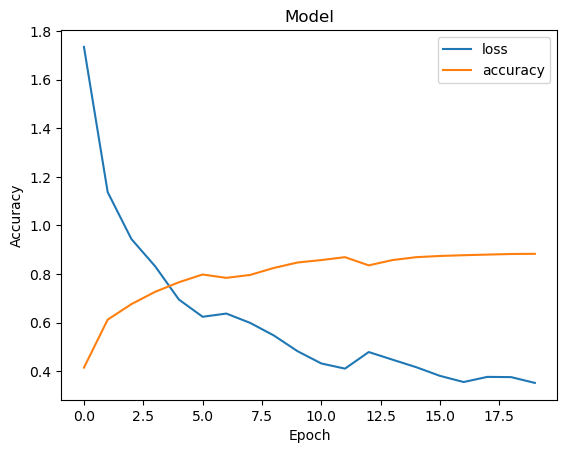

In [ ]:
df_all_history = pd.read_csv('history.csv')

plt.plot(df_all_history['loss'])
plt.plot(df_all_history['accuracy'])
plt.title('Model')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['loss','accuracy'], loc='best')
plt.show()

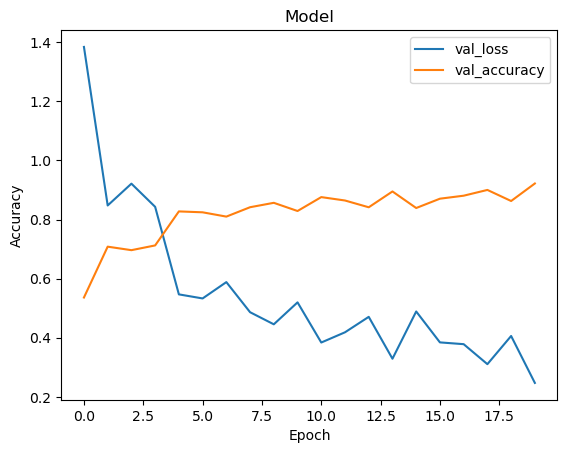

In [ ]:
plt.plot(df_all_history['val_loss'])
plt.plot(df_all_history['val_accuracy'])
plt.title('Model')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['val_loss','val_accuracy'], loc='best')
plt.show()

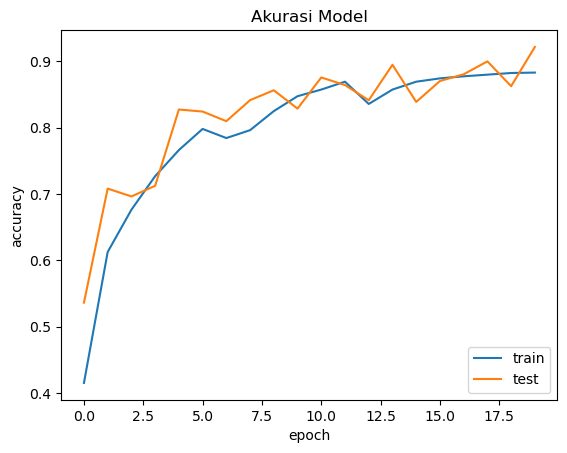

In [ ]:
# Menampilkan Plot 'Akurasi Model'

plt.plot(df_all_history['accuracy'])
plt.plot(df_all_history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

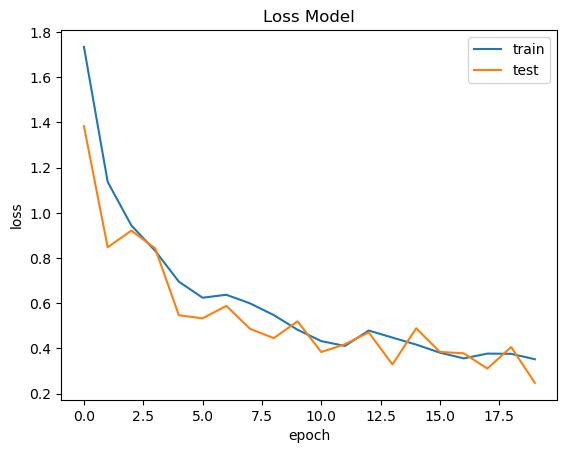

In [ ]:
# Menampilkan Plot 'Loss Model'

plt.plot(df_all_history['loss'])
plt.plot(df_all_history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from typing import final
final_acc = df_all_history['accuracy'].iloc[-1]
final_val_acc = df_all_history['val_accuracy'].iloc[-1]
final_loss = df_all_history['loss'].iloc[-1]
final_val_loss = df_all_history['val_loss'].iloc[-1]

print(f"Final Accuracy: {final_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")
print(f"Final Loss: {final_loss}")
print(f"Final Validation Loss: {final_val_loss}")

Final Accuracy: 0.8831250071525574
Final Validation Accuracy: 0.92182719707489
Final Loss: 0.3521581888198852
Final Validation Loss: 0.2472534626722335


In [ ]:
model2.save('final.weights.h5')

In [5]:
output_dir = '/Users/user'
model_name_file = 'final.weights.h5'
model_dir = f'{output_dir}/{model_name_file}'

model_result = load_model(model_dir)

# Mengonversi model ke format TFJS

# Menyimpan model dalam format SavedModel

In [ ]:
!pip install tensorflowjs

import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model_result, 'tfjs_model')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model_result, f'{output_dir}/{export_dir}')

INFO:tensorflow:Assets written to: /Users/user/saved_model/assets


INFO:tensorflow:Assets written to: /Users/user/saved_model/assets


# Convert SavedModel menjadi model.tflite

In [6]:
import tensorflow as tf
import pathlib
import traceback

def convert_model(export_dir):
    try:
        converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
        tflite_model = converter.convert()
        tflite_model_file = pathlib.Path('model.tflite')
        tflite_model_file.write_bytes(tflite_model)

        print("Model converted successfully!")
    except Exception as e:
        print("Error during conversion:", e)
        # Optionally, retry the conversion with a delay or different parameters

In [ ]:
# import tensorflow as tf

# Path ke direktori SavedModel
saved_model_dir = '/Users/user/saved_model'

# Buat TFLiteConverter dari SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# (Opsional) Optimasi model
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Konversi model ke format .tflite
tflite_model = converter.convert()

# Path tempat Anda ingin menyimpan model .tflite
tflite_model_path = '/Users/user/tf-lite/model.tflite'

# Simpan model .tflite
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)



## **Plot distribusi gambar di seluruh kelas**

## **Plot distribusi untuk semua kelas**


# DATA AUGMENTATION

### Data Preprocessing

#### Split Dataset

## Modelling

## Evaluasi dan Visualisasi

## Konversi Model

## Inference (Optional)

In [ ]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
